In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#Importing the dataset
train_dir = 'C:\\Users\\binur\\Downloads\\archive (1)\\Training'
test_dir = 'C:\\Users\\binur\\Downloads\\archive (1)\\Testing'

In [3]:
#Creating the training dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir, validation_split=0.2, subset='training',
                                                                seed=42, image_size=(224,224), batch_size=32,)
#Creating the testing dataset
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                seed=42, image_size=(224,224), batch_size=32,)

#Creating the validation dataset
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir, validation_split=0.2, subset='validation',
                                                              seed=42, image_size=(224,224), batch_size=32,)



Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 1311 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.
Using 262 files for validation.


* **tf.keras.preprocessing.image_dataset_from_directory** is a function that is used to load images from a directory into a TensorFlow dataset. 


* It is commonly used in deep learning applications to load and preprocess large image datasets for training deep neural networks.


* The function takes the path to a directory containing images as input, and returns a TensorFlow dataset object that can be used to train a model. 


* It automatically labels the images based on their directory structure and applies data augmentation techniques such as random cropping, flipping, and resizing to the images. 

In [4]:
#Checking for the classes
class_names = train_data.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

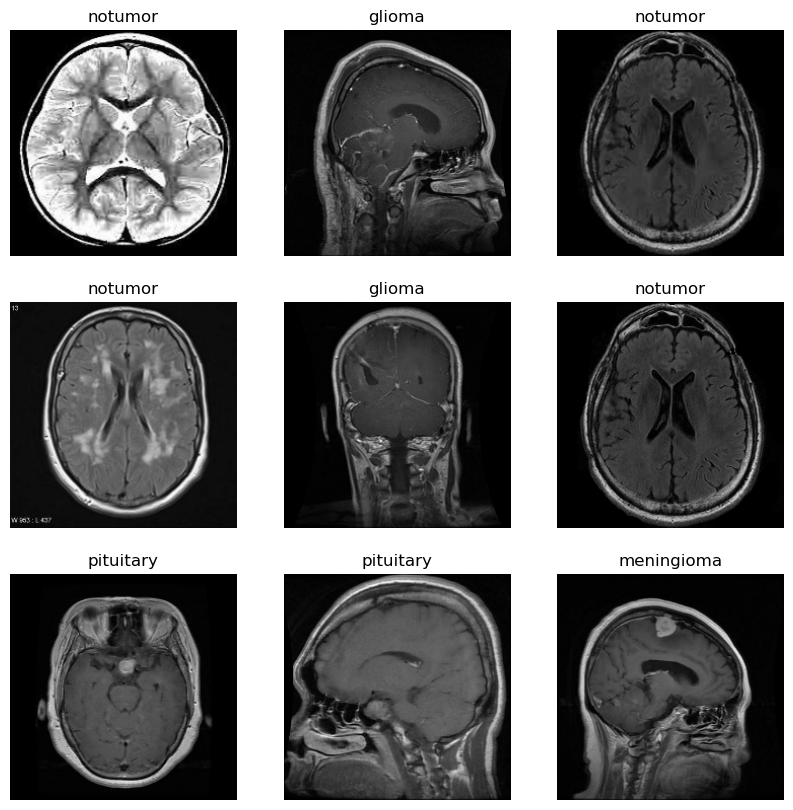

In [5]:
#Viewing the images in the dataset
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

* This code is used to visualize a batch of images and their corresponding labels from the training data.


* **plt.figure(figsize=(10,10))**:  Creates a new figure with the specified size of 10x10 inches.


* **for images, labels in train_data.take(1):**: Iterates over the first batch of images and their corresponding labels from the train_data dataset.


* **for i in range(9):**: Iterates over the first 9 images in the batch.


* **ax = plt.subplot(3, 3, i+1)**: Creates a new subplot with 3 rows, 3 columns, and the i+1-th position in the grid.


* **plt.imshow(images[i].numpy().astype('uint8'))**: Displays the i-th image from the batch as a 2D grid of pixels.


* **plt.title(class_names[labels[i]])**: Sets the title of the subplot to the label of the i-th image, using the class_names list to map the integer label to its corresponding class name.


* **plt.axis('off')**: Hides the x and y axis ticks and labels for the subplot.


* Together, these commands produce a 3x3 grid of subplots, each containing an image from the batch and its corresponding label as the title. This allows you to quickly inspect the data and verify that the images are being loaded and labeled correctly.

In [6]:
#Creating the base model on top of the MobileNetV3 model
base_model = keras.applications.MobileNetV3Small(input_shape=(224,224,3), include_top=False, weights='imagenet')

4334752/4334752 [==============================] - 3s 1us/step


* **MobileNetV3** is a family of lightweight and efficient models for image classification tasks that were introduced by Google in 2019. The MobileNetV3Small model is a smaller and faster version of MobileNetV3 that is optimized for mobile and embedded devices.


* By using a pre-trained model like MobileNetV3Small as the base model, you can leverage the learned features from millions of images to improve the accuracy of your own image classification model. You can then fine-tune the model by adding new layers and training it on your own dataset.


* **include_top parameter** is set to **False** to exclude the fully connected layers at the end of the model. This allows us to add our own classification layers on top of the base model.


* By setting **weights to 'imagenet'**, we are initializing the model with pre-trained weights that have already learned to classify a large number of objects from the ImageNet dataset. This can save a significant amount of training time, as the model can start with a good set of weights instead of having to learn everything from scratch.

In [7]:
#Freeze convolutional base
base_model.trainable = False
base_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

* **base_model.trainable = False** is a line of code that sets the trainable attribute of the base_model to False.


* In Keras, you can set the **trainable attribute** of a model to control whether the weights of the model should be updated during training or not. When trainable is set to True, the weights of the model are updated during training to minimize the loss function. When trainable is set to False, the weights are frozen and are not updated during training.


* By setting **base_model.trainable to False**, we are freezing the weights of the MobileNetV3Small model, which means that they will not be updated during training of our own image classification model. This is a common technique in transfer learning, where we start with a pre-trained model and fine-tune it on a new dataset. Freezing the weights of the pre-trained model allows us to keep the learned features and prevent overfitting, while only updating the weights of the new layers that we add on top of the pre-trained model.

* Data augmentation is a technique used in machine learning and computer vision to increase the size of a dataset by creating modified versions of existing images.


* This is done by applying a variety of image transformations such as rotation, scaling, flipping, shearing, and cropping, as well as adjusting brightness, contrast, and other image properties.


* The goal of data augmentation is to introduce variability into the training data to improve the model's ability to generalize to new, unseen data.


* By using data augmentation, we can create many variations of each image in our dataset, which helps to prevent overfitting and improve the performance of our model. 


* For example, if we have a dataset of handwritten digits, we can create new images by rotating, scaling, or shifting the original images. 


* This will create a larger and more diverse dataset that will be more representative of the real-world data.


* In **Keras**, data augmentation can be easily implemented using the **ImageDataGenerator class**. 


* This class provides many built-in methods for applying different types of image transformations to the training data, as well as options for specifying the degree and direction of the transformations. 

In [9]:
#Data Augmentation
data_augmentation = keras.models.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.2)
])

* **RandomFlip** is a layer that randomly flips input images horizontally or vertically with a given probability.


* **RandomRotation** is a layer that randomly rotates input images by a given angle **in radians** within a specified range. In this case, the argument 0.2 specifies that we want to rotate images by up to 20% of the image's width or height.

In [13]:
num_classes = len(class_names)

inputs = keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = keras.applications.mobilenet_v3.preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs,outputs)

* inputs is a Keras **Input layer** that defines the shape of our input images (224x224x3, for 3 color channels).


* data_augmentation is a Keras Sequential model that applies random image transformations to our input images in real-time during training, as we discussed earlier.


* **keras.applications.mobilenet_v3.preprocess_input** is a function that preprocesses our input images to match the preprocessing that was applied to the MobileNetV3Small architecture during pretraining. This includes scaling pixel values to the range [-1, 1].


* **base_model** is the pre-trained MobileNetV3Small model that we loaded earlier, with its weights frozen. We apply this model to our input images to extract features that we will use for classification.


* **GlobalAveragePooling2D** is a Keras layer that calculates the average value of each feature map in the previous layer. This reduces the spatial dimensionality of our feature maps and helps to reduce overfitting by summarizing the most important features for each image.


* **Dropout** is a Keras layer that randomly sets a fraction of input units to 0 during training. This also helps to reduce overfitting by forcing the model to learn more robust and generalizable features. In this case, we set the dropout rate to 0.2, meaning that 20% of the input units will be set to 0 during training.


* Finally it creates a new Keras Model that takes inputs as input and produces outputs as output.


* **inputs** is the **input layer** of our model that we defined earlier.


* **outputs** is the **output layer** of our model, which we define in the next line.


* The **(x)** in some lines of the code above is used to pass the output of the previous layer as input to the current layer.

In [14]:
#Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_2   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 576)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2308      
                                                                 
Total params: 941,428
Trainable params: 2,308
Non-trainable p

* **loss='sparse_categorical_crossentropy'** specifies the loss function used to measure how well the model predicts the correct class label. In this case, the **sparse_categorical_crossentropy** is used since we have **multiple classes.**


* **Sparse Categorical Crossentropy** is a type of loss function used in **multi-class classification** tasks. It is a mathematical function that compares the predicted class probabilities to the actual class labels and returns a measure of how well the predicted probabilities match the true labels.


* In contrast to **Categorical Crossentropy**, which requires the class labels to be in one-hot encoded format, **Sparse Categorical Crossentropy expects the class labels to be integers representing the class index.** This means that if the true class label is represented by an integer y, then Sparse Categorical Crossentropy computes the cross-entropy loss between the predicted class probabilities and a one-hot encoded vector with a 1 at index y and 0 elsewhere.


* **Sparse Categorical Crossentropy is commonly used as a loss function in neural network models for classification tasks where there are more than two classes.**

In [15]:
#Fitting the model
initial_epochs = 15

early_stop = keras.callbacks.EarlyStopping(patience=1,restore_best_weights=True)
history = model.fit(train_data, validation_data=test_data, epochs=initial_epochs, callbacks=[early_stop])

Epoch 1/15
143/143 [==============================] - 31s 172ms/step - loss: 0.7968 - accuracy: 0.6759 - val_loss: 0.5502 - val_accuracy: 0.8017
Epoch 2/15
143/143 [==============================] - 23s 161ms/step - loss: 0.4634 - accuracy: 0.8411 - val_loss: 0.4577 - val_accuracy: 0.8307
Epoch 3/15
143/143 [==============================] - 23s 160ms/step - loss: 0.3873 - accuracy: 0.8676 - val_loss: 0.4078 - val_accuracy: 0.8444
Epoch 4/15
143/143 [==============================] - 23s 160ms/step - loss: 0.3581 - accuracy: 0.8759 - val_loss: 0.3799 - val_accuracy: 0.8505
Epoch 5/15
143/143 [==============================] - 23s 160ms/step - loss: 0.3278 - accuracy: 0.8821 - val_loss: 0.3614 - val_accuracy: 0.8658
Epoch 6/15
143/143 [==============================] - 23s 159ms/step - loss: 0.3030 - accuracy: 0.8926 - val_loss: 0.3399 - val_accuracy: 0.8741
Epoch 7/15
143/143 [==============================] - 23s 160ms/step - loss: 0.2892 - accuracy: 0.8956 - val_loss: 0.3267 - val_ac

* **patience** refers to the number of epochs with no improvement after which training will be stopped, and **restore_best_weight**s ensures that the weights from the epoch with the best validation loss are used for evaluation.

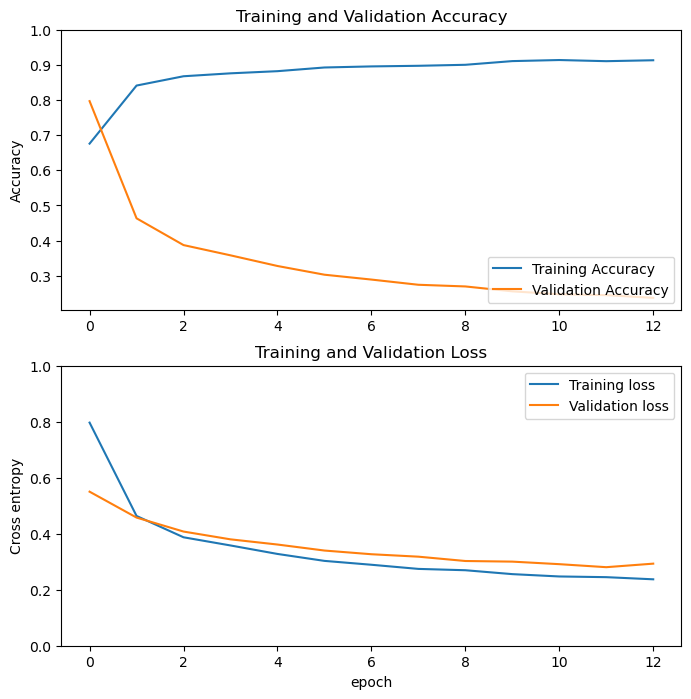

In [17]:
#Checking the accuracy score and the loss
acc = history.history['accuracy']   
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc,label='Training Accuracy')
plt.plot(loss, label='Validation Accuracy')
plt.legend(loc='lower right')  #loc
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1]) 
plt.title('Training and Validation Accuracy')

plt.subplot(2,1,2)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

* In TensorFlow/Keras, the **fit()** returns a **History object** which contains information about the training process such as the training/validation loss and accuracy at each epoch. This information can be used to plot the training and validation curves to analyze the model's performance during training.


* In the code above, the history variable is used to extract the training and validation loss and accuracy values at each epoch, which are then used to plot the corresponding curves.


* The **loc parameter** in **plt.legend()** specifies the location of the legend in the plot. It accepts various string arguments to specify the location such as **'upper left', 'upper right', 'lower left', 'lower right', 'center', 'center left', 'center right', 'right', 'left', 'lower center', and 'upper center'.**


* The **ylim function** is used to set the y-axis limits, with the **minimum being the minimum value in the plot** and the **maximum being 1**.  

# Testing the model

1/1 [==============================] - 0s 65ms/step


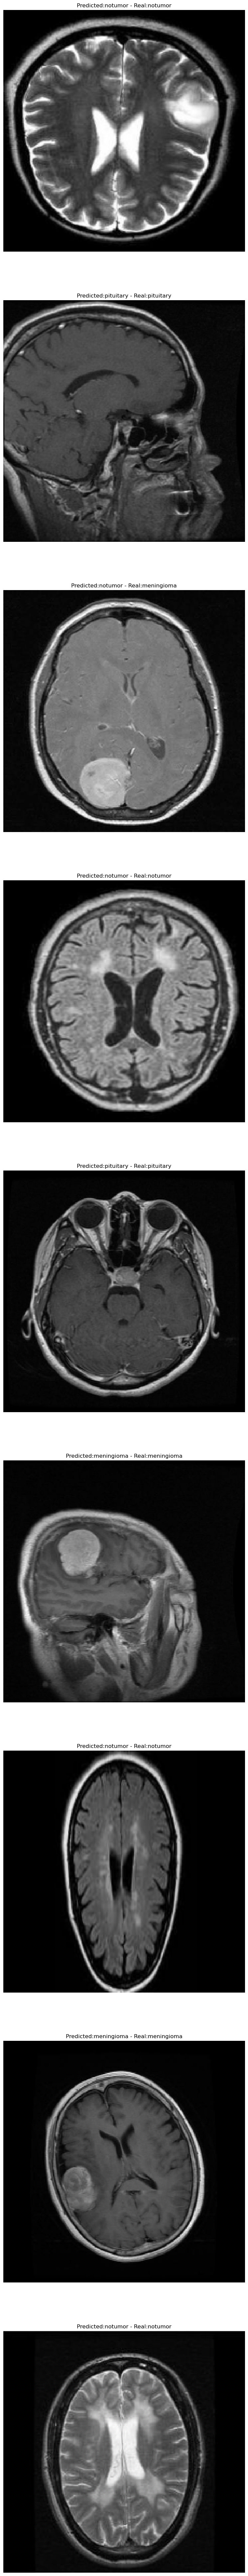

In [20]:
plt.figure(figsize=(10,100))
for images, labels in test_data.take(1):
    prediction = model.predict(images, batch_size=32)
    for i in range(9):
        ax = plt.subplot(9,1,i+1)
        pred = np.argmax(prediction[i])
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'Predicted:{class_names[pred]} - Real:{class_names[labels[i]]}')
        plt.axis('off')

In [21]:
#Checking the accuracy
results = model.evaluate(test_data,verbose=0)
results

[0.2804929316043854, 0.8878718614578247]

In [22]:
print("Test Loss: {:.5f}".format(results[0]))
print("Accuracy on the test set: {:.2f}%".format(results[1] * 100))

Test Loss: 0.28049
Accuracy on the test set: 88.79%
